In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df = pd.read_csv("/content/drive/MyDrive/deep learning/creditcard.csv")

In [3]:
#to show first 5 records
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#to remove the uncessary columns
df.drop(['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28'],axis=1,inplace=True)


In [5]:
df.head()

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0
3,1.0,123.50,0
4,2.0,69.99,0


In [6]:
#to find null value
df.isnull().sum()

Time      0
Amount    0
Class     0
dtype: int64

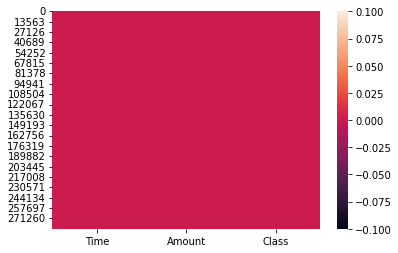

In [7]:
#vusualise the null value
sb.heatmap(df.isnull())
plt.show()

In [8]:
#cross check
#to check data types
df.dtypes

Time      float64
Amount    float64
Class       int64
dtype: object

In [9]:
#to check duplicates values
df.duplicated().sum()

4857

In [10]:
#to check how many rows and columns
df.shape

(284807, 3)

0    284315
1       492
Name: Class, dtype: int64


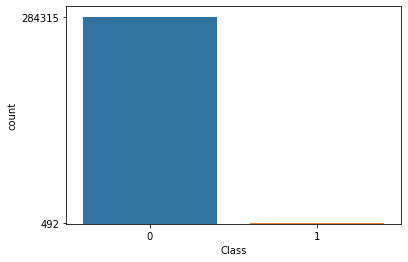

In [11]:
#check balance or unbalance 
#here target:class
#check categorical data use countplot
sb.countplot(data=df,x='Class')
f=df['Class'].value_counts()
print(f)
plt.yticks(f)
plt.show()


In [12]:
#clearly,see data is unbalanced

In [13]:
#select input and output
X = df.drop('Class', axis =1)
Y = df['Class']


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=1)

In [16]:
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [17]:
X_train.shape, X_test.shape

((199364, 2), (85443, 2))

In [18]:
#first check Y_train(0 & 1): how many sample of 0's and 1's
Y_train.value_counts()

0    199007
1       357
Name: Class, dtype: int64

In [19]:
#clearly understand, data is unbalance
#now we have to balance to given dataset means Y_train 
#use RandomOverSampler means to convert minorty class into majority class
#means increase means make a duplicates copy of some records randomly 
#and force minority class converts to majority class


In [20]:
#!pip install imblearn

In [21]:
from imblearn.over_sampling import RandomOverSampler
#RandomOverSampler inbuilt class which defined in outer class over sampling & over_sampling defined in inbuilt class

In [22]:
#create the object of class RandomOverSampler
ros=RandomOverSampler(random_state=1)
X_train1,Y_train1=ros.fit_resample(X_train,Y_train)
#fit_resample() inbuilt method of RandomOverSampler class

In [23]:
X_train1.shape,Y_train1.shape

((398014, 2), (398014,))

In [24]:
#check y_train
Y_train1.value_counts()

0    199007
1    199007
Name: Class, dtype: int64

In [25]:
#check y_test
Y_test.value_counts()

0    85308
1      135
Name: Class, dtype: int64

In [26]:
#clearly,y_test data is unbalanced

In [27]:
ros=RandomOverSampler(random_state=1)
X_test1,Y_test1=ros.fit_resample(X_test,Y_test)

In [28]:
X_test1.shape,Y_test1.shape

((170616, 2), (170616,))

In [29]:
#again check y_test1
Y_test1.value_counts()

0    85308
1    85308
Name: Class, dtype: int64

In [30]:
#create a neural network
import tensorflow as tf
#create the object of Sequential class
model=tf.keras.Sequential([
    #first hidden layer
    tf.keras.layers.Dense(units=8,activation="relu",input_shape=(X.shape[1],)),
    #output layer
    tf.keras.layers.Dense(units=1,activation="sigmoid")
])

In [31]:
##to show summary
model.summary()  #summary() inbuilt method of Sequential class

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 24        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [32]:
#compile the model
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
#Create the object of EarlyStopping class
from tensorflow.keras.callbacks import EarlyStopping
cb=EarlyStopping(
    monitor="val_loss",  #val_loss means validation loss means testing error
    min_delta=0.00001, #differtiate karke lamda se multiple karta hai
    patience=20,#run upto 20 
    verbose=1, 
    mode='auto', #to see minimum loss val_loss means minimum and val_score means maximum
    baseline=None,   #neuornal network to decide the weight and bias first time
    restore_best_weights=False #jaha itreation stop hoga wahi final weight and bias hoga old weight and bias restore nhi karega 
)   

In [34]:
#train the model,fit() inbuilt method of Sequential class
#trained_model=model.fit(X1_train,Y1_train,epochs=5000)#epochs means iteration
trained_model=model.fit(X_train1,Y_train1,
                        epochs=5000,callbacks=cb,validation_data=(X_test1,Y_test1))
#trained_model user defined object which hold value of loss for each epoch(itreation)

Epoch 1/5000
12438/12438 [==============================] - 54s 4ms/step - loss: 0.6771 - accuracy: 0.5714 - val_loss: 0.6810 - val_accuracy: 0.5568
Epoch 2/5000
12438/12438 [==============================] - 41s 3ms/step - loss: 0.6700 - accuracy: 0.6081 - val_loss: 0.6763 - val_accuracy: 0.5849
Epoch 3/5000
12438/12438 [==============================] - 38s 3ms/step - loss: 0.6661 - accuracy: 0.6194 - val_loss: 0.6738 - val_accuracy: 0.5999
Epoch 4/5000
12438/12438 [==============================] - 37s 3ms/step - loss: 0.6631 - accuracy: 0.6246 - val_loss: 0.6725 - val_accuracy: 0.6050
Epoch 5/5000
12438/12438 [==============================] - 41s 3ms/step - loss: 0.6605 - accuracy: 0.6281 - val_loss: 0.6720 - val_accuracy: 0.6117
Epoch 6/5000
12438/12438 [==============================] - 36s 3ms/step - loss: 0.6582 - accuracy: 0.6308 - val_loss: 0.6689 - val_accuracy: 0.6036
Epoch 7/5000
12438/12438 [==============================] - 37s 3ms/step - loss: 0.6547 - accuracy: 0.6334

In [ ]:
#Model evaluation
print("Training loss and Training Accuracy:",model.evaluate(X_train,Y_train))
print("Testing loss and Testing Accuracy:",model.evaluate(X_test,Y_test))

3242/6231 [==============>...............] - ETA: 6s - loss: 0.6299 - accuracy: 0.6837

In [ ]:
#visualisation for testing and training loss 
plt.plot(trained_model.history['loss'],label="Training loss",color='red')   #history inbuilt method
plt.plot(trained_model.history['val_loss'],label='Testing loss',color='green')
plt.xlabel=("No. of Epochs")
plt.ylabel("binary cross entropy Loss")
plt.legend()
plt.show()

In [ ]:
#visualisation for testing and training loss 
plt.plot(trained_model.history['accuracy'],label="Training_Accuracy",color='red')   #history inbuilt method
plt.plot(trained_model.history['val_accuracy'],label='Testing_Accuracy',color='green')
plt.xlabel=("No. of Epochs")
plt.ylabel("Accuracy of model")
plt.legend()
plt.show()

In [ ]:
#to show weight and bias on each layers
model.get_weights()

In [ ]:
#test the model with 30% data
Y_pred=model.predict(X_test).round(2)
#formula of pridiction y_pred=1/(1+np.exp(-x_test)):return the value of probability (0-1)

In [ ]:
Y_pred=np.where(Y_pred>=0.5,1,0)
print(Y_pred)

In [ ]:
#Generate Classification Report and confusion matrix 
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

In [ ]:
#the acuracy of model is good but not best so to increase the accuracy we will add more hidden layers in neural network.

In [ ]:
#create a neural netowrk(Artifical neural network bcz the data is in structured format and we will use tensor flow for that)
#using inbuilt class
#create a objetc of sequnetial class 
model2=tf.keras.Sequential([
    #first hidden layer
    tf.keras.layers.Dense(units=1024,activation='relu',input_shape=(X.shape[1],)),
    #if we want to increase128
    tf.keras.layers.Dense(units=512,activation='relu'),
    tf.keras.layers.Dense(units=256,activation='relu'),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(units=64,activation='relu'),
    tf.keras.layers.Dense(units=32,activation='relu'),
    #output layer
    tf.keras.layers.Dense(units=16,activation='relu'),
    tf.keras.layers.Dense(units=1,activation='sigmoid')#and by default the activation is linear if not mentioned
])

In [ ]:
#complie the mdoel
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#create a procedure for each epoch
from tensorflow.keras.callbacks import EarlyStopping
#create the object of early stopping class
cb=EarlyStopping(
    monitor='val_loss',#means validation loss means testing error(to monitor testing loss)
    min_delta=0.00001,#LEARNING RATE
    patience=20,#till how many step  we have to see more
    verbose=1,#how many iteration is required to train the model by a msg
    mode='auto',#val loss ki minimum error pe rukhna hai or val score hota toh maximum pe rukhna hai
    baseline=None,#by default the weight and bias is assigned by the neural network 
    restore_best_weights=False#Final weight and bias after global minima(wapas se new weight aur bbias na initialize kare)


)

In [ ]:
#now train the model with the help of fit() inbuilt method of sequential class
trained_model2=model2.fit(X_train1,Y_train1,epochs=5000,callbacks=cb,
                        validation_data=(X_test1,Y_test1))

In [ ]:
#evaluating the model
print('Training loss and training accuracy',model2.evaluate(X_train1,Y_train1))
print('Testing loss and testing accuracy',model2.evaluate(X_test1,Y_test1))

In [ ]:
#from above we can conclude that the accuracy increases rapidly may be because of overfitting of additional hidden layer or neural network 
#so to normalize the accuracy we have to apply regularization.



In [ ]:
#create a neural netowrk(Artifical neural network bcz the data is in structured format and we will use tensor flow for that)
#using inbuilt  and apply regularisation 
#call class regularizer
from tensorflow.keras import regularizers
#create a object of sequnetial class 
model=tf.keras.Sequential([
    #first hidden layer
    tf.keras.layers.Dense(units=256,activation='relu',
                          kernel_regularizer=regularizers.l2(0.01),#l2 means ridge 
                          input_shape=(X.shape[1],)),
    #second hidden alyer to increase the accuracy
    tf.keras.layers.Dense(units=128,activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    #third layer
    tf.keras.layers.Dense(units=64,activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    #the neuron(units=11) can be same or one less
    #output layer
    tf.keras.layers.Dense(units=1,activation='sigmoid',kernel_regularizer=regularizers.l2(0.01))#and by default the activation is linear if not mentioned then as per the categories of dataset
    #here the activation function will be sigmoid
])
#l2 ranges from 0 to 1 first 0.01,0.02 then slowly increase if we want

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#now train the model
trained_model3=model.fit(X_train1,Y_train1,epochs=5000,callbacks=cb,batch_size=32,
                        validation_data=(X_test1,Y_test1))

In [ ]:
#since the accuracy is dropped after applying regularization so to resolve this issue we have to apply droput technique


In [ ]:
from tensorflow.keras.layers import Dropout
model4=tf.keras.Sequential([
    #first hidden layer
    tf.keras.layers.Dense(units=128,activation='relu',
                          kernel_regularizer=regularizers.l2(0.01),#l2 means ridge
                          
                          input_shape=(X.shape[1],)),Dropout(0.50),
    #second hidden alyer to increase the accuracy
    tf.keras.layers.Dense(units=62,activation='relu',kernel_regularizer=regularizers.l2(0.01)),Dropout(0.50),
    #third layer
    tf.keras.layers.Dense(units=32,activation='relu',kernel_regularizer=regularizers.l2(0.01)),Dropout(0.50),
    tf.keras.layers.Dense(units=16,activation='relu',kernel_regularizer=regularizers.l2(0.01)),Dropout(0.50),
    #the neuron(units=11) can be same or one less
    #output layer
    tf.keras.layers.Dense(units=1,activation='sigmoid',kernel_regularizer=regularizers.l2(0.01))#and by default the activation is linear if not mentioned then as per the categories of dataset
    #here the activation function will be sigmoid
])

In [ ]:
model4.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#now train the model
trained_model4=model4.fit(X_train1,Y_train1,epochs=5000,callbacks=cb,batch_size=32,
                        validation_data=(X_test1,Y_test1))

In [ ]:
#evaluating the model
print('Training loss and training accuracy',model2.evaluate(X_train1,Y_train1))
print('Testing loss and testing accuracy',model2.evaluate(X_test1,Y_test1))

In [ ]:
#visulaize training and testing loss
plt.plot(trained_model4.history['loss'],label='Training loss')
plt.plot(trained_model4.history['val_loss'],label='Testing loss')
plt.xlabel('no of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
#appyling list comperhension to select those class whose got highest prob
y_pred=[np.argmax(i) for i in y_pred]
y_pred

In [ ]:
#generate the classififcationn report and confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test1,y_pred))
print(confusion_matrix(Y_test1,y_pred))